In [1]:
cd drive/MyDrive/Colab Notebooks/CAPTCHA Cracking using CNN

/content/drive/MyDrive/Colab Notebooks/CAPTCHA Cracking using CNN


In [86]:
import numpy as np
import keras
from keras.models import Model, Sequential
from keras.utils import plot_model
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, Input, LSTM
from keras.applications.vgg16 import VGG16
from keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cv2
import os
import pandas as pd
import string
plt.style.use('fivethirtyeight')

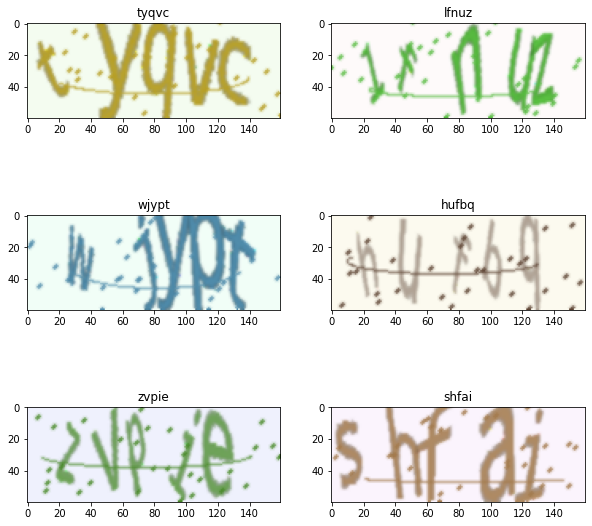

In [3]:
sample_imgs = os.listdir('images/train/')[:6]
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
i = 0
j = 0
for filename in sample_imgs:
    img = cv2.imread(f'images/train/{filename}')
    ax[i, j].imshow(img)
    ax[i, j].set_title(f'{filename[:5]}')
    j += 1
    if j%2 == 0:
      j = 0
      i += 1

In [4]:
symbols = list(string.ascii_lowercase)
NO_OF_CLASSES = len(symbols)
NO_OF_CLASSES

26

In [5]:
pwd

'/content/drive/My Drive/Colab Notebooks/CAPTCHA Cracking using CNN'

In [6]:
IMG_SHAPE = (60, 160, 3)
len(os.listdir('images/train/'))

5000

In [7]:
num_of_images = len(os.listdir('images/train/'))
X = np.zeros((num_of_images, 60, 160, 3))
y = np.zeros((5, num_of_images, NO_OF_CLASSES))

for i, fname in enumerate(os.listdir('images/train/')):
  img = cv2.imread(f'images/train/{fname}')
  target = fname[:5]
  img = img/255.0
  sym = np.zeros((5, NO_OF_CLASSES))
  for j, k in enumerate(target):
    idx = symbols.index(k)
    sym[j, idx] = 1
  X[i] = img
  y[:, i] = sym
  if (i+1) % 500 == 0:
    print(f"{i} images loaded")

499 images loaded
999 images loaded
1499 images loaded
1999 images loaded
2499 images loaded
2999 images loaded
3499 images loaded
3999 images loaded
4499 images loaded
4999 images loaded


In [8]:
num_of_images = len(os.listdir('images/test/'))
X_test = np.zeros((num_of_images, 60, 160, 3))
y_test = np.zeros((5, num_of_images, NO_OF_CLASSES))

for i, fname in enumerate(os.listdir('images/test/')):
  img = cv2.imread(f'images/test/{fname}')
  target = fname[:5]
  img = img/255.0
  sym = np.zeros((5, NO_OF_CLASSES))
  for j, k in enumerate(target):
    idx = symbols.index(k)
    sym[j, idx] = 1
  X_test[i] = img
  y_test[:, i] = sym
  if i % 50 == 0:
    print(f"{i} images loaded")

0 images loaded
50 images loaded
100 images loaded
150 images loaded
200 images loaded
250 images loaded
300 images loaded
350 images loaded
400 images loaded
450 images loaded


In [9]:
print("X_train Shape: ", X.shape)
print("y_train Shape: ", y.shape)
print("X_test Shape: ", X_test.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (5000, 60, 160, 3)
y_train Shape:  (5, 5000, 26)
X_test Shape:  (500, 60, 160, 3)
y_test Shape:  (5, 500, 26)


In [14]:
inp = Input(shape=(60, 160, 3))
conv1 = Conv2D(16, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.05))(inp)
mp1 = MaxPool2D(padding='same')(conv1) 
conv2 = Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01))(mp1)
mp2 = MaxPool2D(padding='same')(conv2)
conv3 = Conv2D(32, (5, 5), padding='same', activation='relu')(mp2)
bn = BatchNormalization()(conv3)
mp3 = MaxPool2D(padding='same')(bn)
conv4 = Conv2D(128, (3, 3), padding='same', activation='relu')(mp3)
mp4 = MaxPool2D(padding='same')(conv4)

flat = Flatten()(mp4)
outs = []
for _ in range(5):
  dense1 = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(flat)
  drop1 = Dropout(0.2)(dense1)
  dense2 = Dense(64, activation='relu')(drop1)
  drop2 = Dropout(0.25)(dense2)
  res = Dense(NO_OF_CLASSES, activation='sigmoid')(drop2)

  outs.append(res)
model = Model(inp, outs)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])


In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 60, 160, 3)] 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 60, 160, 16)  448         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 30, 80, 16)   0           conv2d_4[0][0]                   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 30, 80, 32)   4640        max_pooling2d_4[0][0]            
____________________________________________________________________________________________

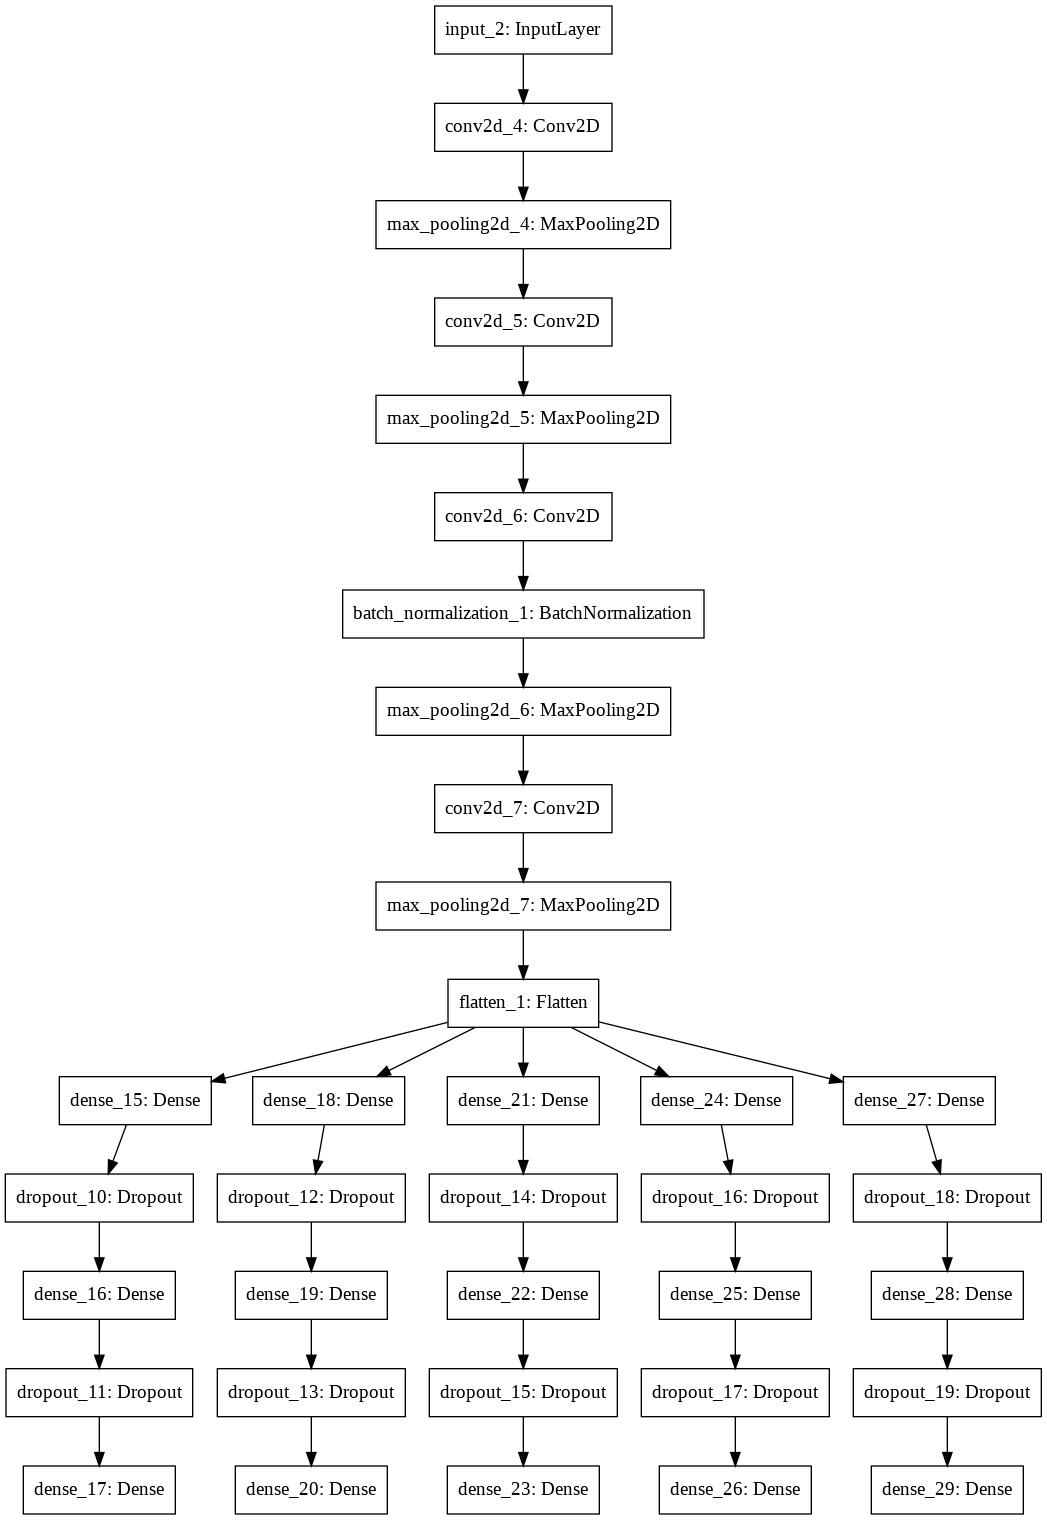

In [88]:
plot_model(model)

In [17]:
hist = model.fit(X, [y[0], y[1], y[2], y[3], y[4]], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
125/125 [==============================] - 4s 18ms/step - loss: 20.1222 - dense_17_loss: 3.3020 - dense_20_loss: 3.2833 - dense_23_loss: 3.3011 - dense_26_loss: 3.3081 - dense_29_loss: 3.3279 - dense_17_accuracy: 0.0407 - dense_20_accuracy: 0.0376 - dense_23_accuracy: 0.0406 - dense_26_accuracy: 0.0322 - dense_29_accuracy: 0.0385 - val_loss: 16.9797 - val_dense_17_loss: 3.2579 - val_dense_20_loss: 3.2586 - val_dense_23_loss: 3.2583 - val_dense_26_loss: 3.2578 - val_dense_29_loss: 3.2582 - val_dense_17_accuracy: 0.0500 - val_dense_20_accuracy: 0.0350 - val_dense_23_accuracy: 0.0440 - val_dense_26_accuracy: 0.0530 - val_dense_29_accuracy: 0.0390
Epoch 2/30
125/125 [==============================] - 2s 13ms/step - loss: 16.7802 - dense_17_loss: 3.2521 - dense_20_loss: 3.2519 - dense_23_loss: 3.2442 - dense_26_loss: 3.2511 - dense_29_loss: 3.2517 - dense_17_accuracy: 0.0539 - dense_20_accuracy: 0.0413 - dense_23_accuracy: 0.0517 - dense_26_accuracy: 0.0505 - dense_29_accuracy: 0

In [18]:
model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]], verbose=1)

16/16 [==============================] - 0s 17ms/step - loss: 7.2960 - dense_17_loss: 0.4876 - dense_20_loss: 1.6488 - dense_23_loss: 1.8710 - dense_26_loss: 1.4038 - dense_29_loss: 0.4751 - dense_17_accuracy: 0.8520 - dense_20_accuracy: 0.5660 - dense_23_accuracy: 0.5500 - dense_26_accuracy: 0.6460 - dense_29_accuracy: 0.8680


[7.295997619628906,
 0.4876338243484497,
 1.6488391160964966,
 1.871008038520813,
 1.4038430452346802,
 0.47514769434928894,
 0.8519999980926514,
 0.5659999847412109,
 0.550000011920929,
 0.6460000276565552,
 0.8679999709129333]

In [19]:
def predict(file):
  img = cv2.imread('images/test/'+file)/255.0
  img = np.expand_dims(img, axis=0)
  res = np.array(model.predict(img))
  ans = np.reshape(res, (5, 26))
  l_ind = []
  probs = []
  for a in ans:
    l_ind.append(np.argmax(a))
  capt = ''
  for l in l_ind:
    capt = capt + symbols[l]
  return capt

In [ ]:
predict('gwnjn.png')

'swmim'

In [23]:
counter = {}
for i in range(6):
  counter['count'+str(i)] = 0
counter

{'count0': 0, 'count1': 0, 'count2': 0, 'count3': 0, 'count4': 0, 'count5': 0}

In [24]:
for f in os.listdir('images/test'):
  cap = f.split('.')[0]
  print("Actual:" , cap)
  pred_cap = predict(f)
  print("Predicted: ", pred_cap)
  count = sum(c1!=c2 for c1,c2 in zip(cap, pred_cap))
  counter['count' + str(count)] += 1
  print("= ="*20)

Actual: kjlas
Predicted:  kiaes
= == == == == == == == == == == == == == == == == == == == =
Actual: ktuad
Predicted:  kbuad
= == == == == == == == == == == == == == == == == == == == =
Actual: bmpub
Predicted:  bwplb
= == == == == == == == == == == == == == == == == == == == =
Actual: islff
Predicted:  ishff
= == == == == == == == == == == == == == == == == == == == =
Actual: vjbss
Predicted:  vbbrs
= == == == == == == == == == == == == == == == == == == == =
Actual: rbiol
Predicted:  nblol
= == == == == == == == == == == == == == == == == == == == =
Actual: olnoc
Predicted:  lujtz
= == == == == == == == == == == == == == == == == == == == =
Actual: putfc
Predicted:  puufc
= == == == == == == == == == == == == == == == == == == == =
Actual: opiuu
Predicted:  opiuu
= == == == == == == == == == == == == == == == == == == == =
Actual: kpmuf
Predicted:  kkxuf
= == == == == == == == == == == == == == == == == == == == =
Actual: xvwzl
Predicted:  xwwzl
= == == == == == == == == == == == == 

In [32]:
for i, key in enumerate(counter):
  print(f"# incorrectly predicted symbols: {i}")
  print(f"Count: {counter[key]}")
  print(f"="*70)  

# incorrectly predicted symbols: 0
Count: 92
# incorrectly predicted symbols: 1
Count: 180
# incorrectly predicted symbols: 2
Count: 131
# incorrectly predicted symbols: 3
Count: 71
# incorrectly predicted symbols: 4
Count: 25
# incorrectly predicted symbols: 5
Count: 1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Count of mismatched symbols')

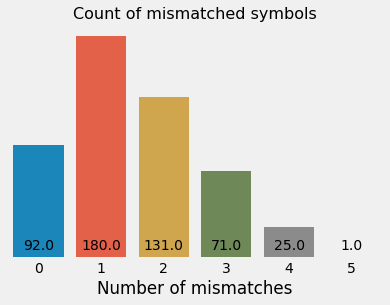

In [87]:
x = [0, 1, 2, 3, 4, 5]
y = list(counter.values())
ax = sns.barplot(x, y)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=2),
           (p.get_x()+p.get_width()/2, 2),
           ha='center', va='center', xytext=(0,10), textcoords='offset points', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.xticks(rotation=0)
ax.set_ylabel("")
ax.set_xlabel("Number of mismatches")
ax.set_title("Count of mismatched symbols", fontsize=16)

In [39]:
df = pd.DataFrame(hist.history)

In [40]:
df.head()

,loss,dense_17_loss,dense_20_loss,dense_23_loss,dense_26_loss,dense_29_loss,dense_17_accuracy,dense_20_accuracy,dense_23_accuracy,dense_26_accuracy,dense_29_accuracy,val_loss,val_dense_17_loss,val_dense_20_loss,val_dense_23_loss,val_dense_26_loss,val_dense_29_loss,val_dense_17_accuracy,val_dense_20_accuracy,val_dense_23_accuracy,val_dense_26_accuracy,val_dense_29_accuracy
0,18.511845,3.269805,3.264317,3.268136,3.271202,3.275460,0.04075,0.03650,0.04125,0.03450,0.04100,16.979719,3.257910,3.258571,3.258253,3.257779,3.258214,0.050,0.035,0.044,0.053,0.039
1,16.621248,3.245461,3.241534,3.231669,3.238326,3.236913,0.05425,0.04800,0.06100,0.05525,0.05775,16.416040,3.215008,3.234605,3.237101,3.238435,3.188639,0.074,0.049,0.068,0.041,0.094
2,15.613018,2.993431,3.138485,3.097394,3.080551,2.955591,0.11025,0.07775,0.09800,0.10725,0.11600,31.499413,3.936573,7.415048,4.608217,9.451953,5.695592,0.097,0.040,0.045,0.025,0.032
3,14.038737,2.619070,2.890728,2.852060,2.767477,2.457494,0.18200,0.13000,0.14700,0.16400,0.21500,41.022495,5.124125,11.845685,8.526181,8.759598,6.269858,0.097,0.040,0.050,0.025,0.047
4,12.481088,2.174646,2.693564,2.605872,2.441315,1.994607,0.27500,0.16650,0.21075,0.22975,0.32225,12.154871,2.099505,2.710568,2.797187,2.268653,1.661378,0.308,0.197,0.160,0.303,0.436


In [56]:
x = list(range(1, 31))
xcol = list(df.columns[:6])
ycol = list(df.columns[11:17])

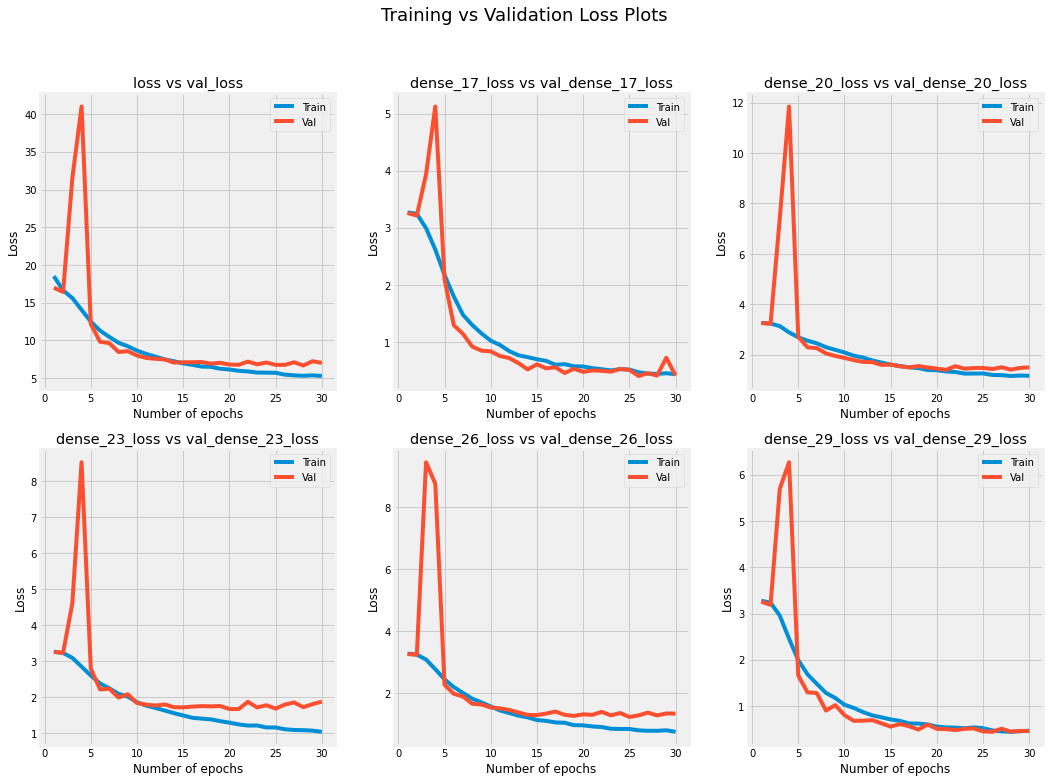

In [64]:
fig, ax = plt.subplots(2, 3, figsize=(16, 12))
fig.suptitle("Training vs Validation Loss Plots", fontsize=18)
c = 0
for i in range(2):
  for j in range(3):
    ax[i][j].plot(x, df[xcol[c]])
    ax[i][j].plot(x, df[ycol[c]])
    ax[i][j].set_title(f'{xcol[c]} vs {ycol[c]}')
    ax[i][j].set_xlabel('Number of epochs')
    ax[i][j].set_ylabel('Loss')
    ax[i][j].legend(labels=['Train', 'Val'])
    c += 1

In [67]:
x = list(range(1, 31))
xcol = list(df.columns[6:11])
ycol = list(df.columns[17:])

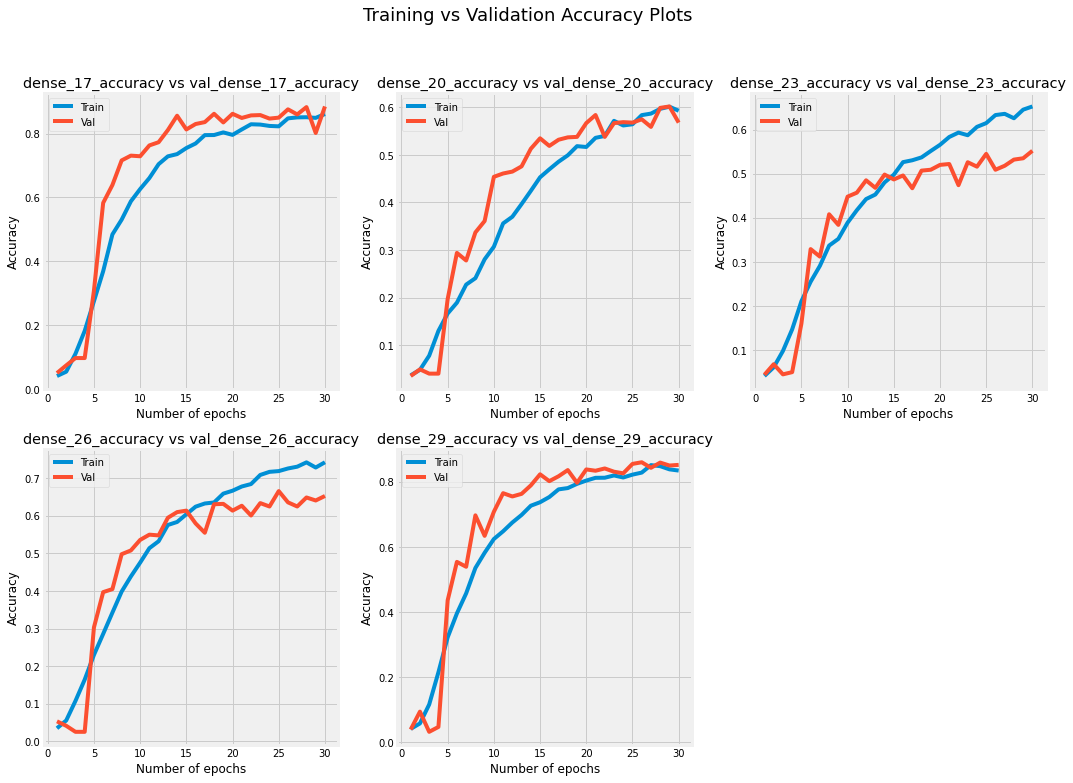

In [70]:
fig, ax = plt.subplots(2, 3, figsize=(16, 12))
fig.suptitle("Training vs Validation Accuracy Plots", fontsize=18)
c = 0
for i in range(2):
  for j in range(3):
    if c == 5:
      break
    ax[i][j].plot(x, df[xcol[c]])
    ax[i][j].plot(x, df[ycol[c]])
    ax[i][j].set_title(f'{xcol[c]} vs {ycol[c]}')
    ax[i][j].set_xlabel('Number of epochs')
    ax[i][j].set_ylabel('Accuracy')
    ax[i][j].legend(labels=['Train', 'Val'])
    c += 1
fig.delaxes(ax[1][2])